INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore
2022-04-06 15:29:59.415324: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-06 15:30:00.909799: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9831 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1
2022-04-06 15:30:00.910469: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 10406 MB memory:  -> device: 1, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:a1:00.0, compute capability: 6.1


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 965)               0         
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
(1, 224, 224, 3)


2022-04-06 15:30:04.273410: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8303


(1, 965)
0.7169212
630
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 965)               0         
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
None


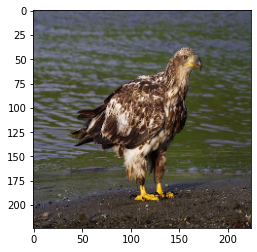

In [1]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import load_model 
import tensorflow.compat.v2 as tf

import numpy as np
import matplotlib.pyplot as plt
import cv2

#import tensorflow.compat.v2 as tf
import tensorflow_hub as hub


model = tf.keras.Sequential([
    hub.KerasLayer('https://tfhub.dev/google/aiy/vision/classifier/birds_V1/1'),
    #tf.keras.layers.Dense(965, activation='softmax')
])
model.build([None, 224, 224, 3])  # Batch input shape.

model.summary()

img = cv2.imread('../images/eagle.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
img = cv2.resize(img, (224,224))
plt.imshow(img)

img = np.expand_dims(img, axis=0)
print(img.shape)
# model = MobileNetV2(weights='my_h5_model.h5', include_top=True)

#model = load_model('../backend_weights/aiy_vision_classifier_birds_V1_1')
#img = preprocess_input(img)
img = img/255

logits = model.predict(img)

model.save("my_h5_model.h5")

print(logits.shape)
print(np.max(logits[0]))
print(np.argmax(logits[0]))

print(model.summary())

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import load_model 
import tensorflow.compat.v2 as tf


model = tf.keras.Sequential([
    MobileNetV2(weights='imagenet', include_top=False),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(965, activation='softmax')
])
model.build([None, 224, 224, 3]) 


# model = MobileNetV2(weights='imagenet', include_top=True)
#print(model.summary())


model.save('test_Deva')

INFO:tensorflow:Assets written to: test_Deva/assets


INFO:tensorflow:Assets written to: test_Deva/assets


In [5]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import load_model 
import tensorflow.compat.v2 as tf


model = tf.keras.Sequential([
    # Explicitly define the input shape so the model can be properly
    # loaded by the TFLiteConverter
    tf.keras.layers.InputLayer(input_shape=(224,224,3)),
    hub.KerasLayer('https://tfhub.dev/google/aiy/vision/classifier/birds_V1/1', output_shape=[965]),
])
model.build((None, 224, 224, 3))
model.summary()

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 965)               0         
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [2]:
m = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/inaturalist/inception_v3/feature_vector/5",
                   trainable=False),  # Can be True, see below.
    tf.keras.layers.Dense(1, activation='softmax')
])
m.build([None, 299, 299, 3])  # Batch input shape.
m.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 2048)              21802784  
                                                                 
 dense (Dense)               (None, 1)                 2049      
                                                                 
Total params: 21,804,833
Trainable params: 2,049
Non-trainable params: 21,802,784
_________________________________________________________________


(1, 224, 224, 3)


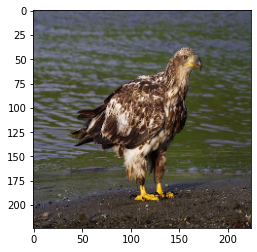

In [8]:
img = cv2.imread('../images/eagle.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
img = cv2.resize(img, (224,224))
plt.imshow(img)

img = np.expand_dims(img, axis=0)
print(img.shape)
# model = MobileNetV2(weights='my_h5_model.h5', include_top=True)

#model = load_model('../backend_weights/aiy_vision_classifier_birds_V1_1')
#img = preprocess_input(img)
img = img/255

logits = model.predict(img)

In [12]:
model.get_weights()

[]